In [ ]:
import matplotlib.pyplot as plt
import os
import glob
from skimage import io, color
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import PIL
import skimage
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/case_study_devdata.csv")
df.head()

,primary_key,transaction_amount,merchant_name,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,49099894,51079.86,MARRIOTT SURAT,IN,0,Hotels,9.0,288000.0,0,0,...,NaN,3500000.0,38758.46000,64367.36941,113262.3533,160922.63220,-0.168474,-0.597603,-0.445636,Affluent_Card
1,45954931,10118.00,DABWALI PETRO,IN,0,Fuel,36.0,25000.0,0,0,...,NaN,NaN,20184.79741,28980.68882,33703.9227,56910.01842,-0.257190,-0.241639,-0.699671,Mass_Card
2,44992070,4378.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,44823072,6337.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,49088796,54934.04,PAYPAL *JIEDUOBANGK,HK,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card


In [ ]:
df.describe()

,primary_key,transaction_amount,target_variable,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,transport_1m,Insurance_1m,...,Bureau_unsec_amt_live,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m
count,5.000000e+04,50000.000000,50000.000000,50000.000000,4.993800e+04,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,...,1.472200e+04,1.020100e+04,3.655000e+04,4.689200e+04,4.689200e+04,4.689200e+04,4.689200e+04,44333.000000,4.419200e+04,4.279900e+04
mean,4.585027e+07,14737.978272,0.052400,25.113156,2.261453e+05,0.0,0.005580,0.097040,0.489380,0.259500,...,2.192050e+06,8.483749e+06,4.121672e+06,5.082253e+05,4.971120e+05,4.947797e+05,5.275031e+05,29.727900,5.777793e+02,8.575324e+01
std,1.902634e+06,26510.123083,0.222835,8.727472,2.573434e+05,0.0,0.106344,0.863017,2.965236,1.647791,...,2.204898e+07,3.484723e+07,3.030054e+07,3.523719e+06,2.701164e+06,2.404562e+06,2.605561e+06,1887.020750,6.038176e+04,7.522945e+03
min,4.302435e+07,2500.000000,0.000000,9.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00
25%,4.418402e+07,3650.000000,0.000000,20.000000,6.700000e+04,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000e+05,1.960000e+06,1.996710e+05,5.433556e+03,7.518414e+03,9.299676e+03,1.083820e+04,-0.332234,-4.260541e-01,-5.232751e-01
50%,4.553429e+07,5964.280000,0.000000,24.000000,1.380000e+05,0.0,0.000000,0.000000,0.000000,0.000000,...,3.959410e+05,3.400000e+06,7.732840e+05,3.268721e+04,3.838613e+04,4.433934e+04,5.529839e+04,-0.002083,-2.892047e-02,-6.563808e-02
75%,4.755758e+07,14339.562500,0.000000,34.000000,3.000000e+05,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000e+06,6.441810e+06,2.858976e+06,1.850243e+05,2.047905e+05,2.284429e+05,2.812371e+05,0.304483,4.309597e-01,5.025618e-01
max,4.920367e+07,730874.460000,1.000000,36.000000,1.500000e+06,0.0,11.000000,28.000000,93.000000,108.000000,...,1.500000e+09,8.980000e+08,1.510000e+09,2.430000e+08,1.590000e+08,1.360000e+08,1.130000e+08,245680.555600,8.859915e+06,1.072938e+06


<Axes: title={'center': 'util_1m'}, xlabel='target_variable'>

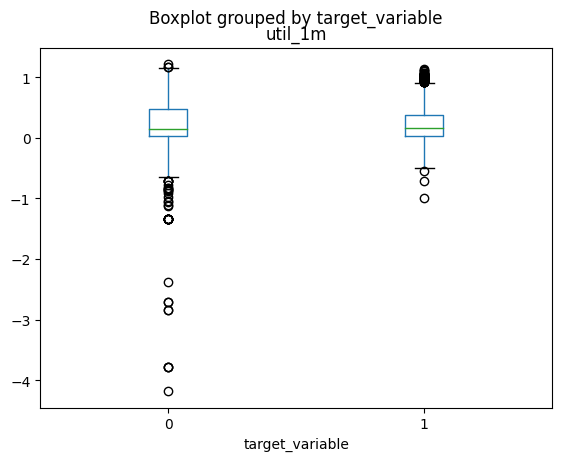

In [ ]:
df.boxplot(by ='target_variable', column =['util_1m'], grid = False)

<Axes: title={'center': 'paymad_1m'}, xlabel='target_variable'>

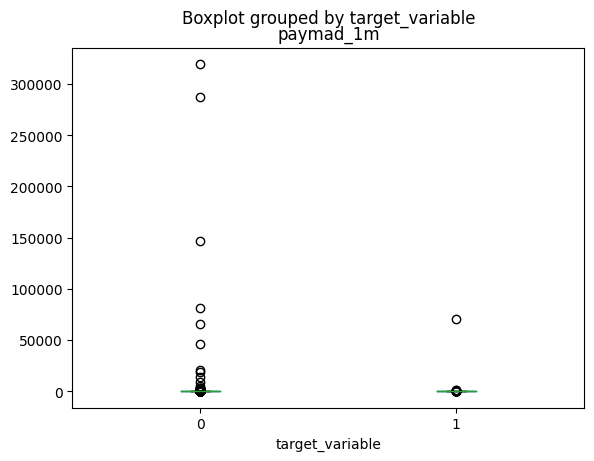

In [ ]:
df.boxplot(by ='target_variable', column =['paymad_1m'], grid = False)

<Axes: title={'center': 'payment_ratio_1m'}, xlabel='target_variable'>

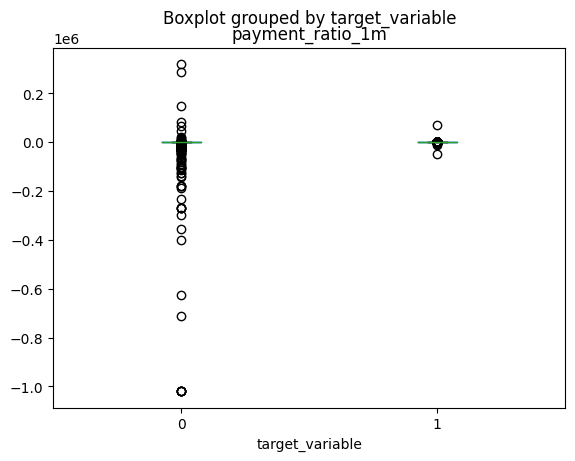

In [ ]:
df.boxplot(by ='target_variable', column =['payment_ratio_1m'], grid = False)

In [ ]:
dfd=df

In [ ]:
dfd.head()

,primary_key,transaction_amount,merchant_name,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,49099894,51079.86,MARRIOTT SURAT,IN,0,Hotels,9.0,288000.0,0,0,...,NaN,3500000.0,38758.46000,64367.36941,113262.3533,160922.63220,-0.168474,-0.597603,-0.445636,Affluent_Card
1,45954931,10118.00,DABWALI PETRO,IN,0,Fuel,36.0,25000.0,0,0,...,NaN,NaN,20184.79741,28980.68882,33703.9227,56910.01842,-0.257190,-0.241639,-0.699671,Mass_Card
2,44992070,4378.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,44823072,6337.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,49088796,54934.04,PAYPAL *JIEDUOBANGK,HK,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card


In [ ]:
dfd.drop('merchant_name',axis=1,inplace=True)
dfd.drop('merchant_country',axis=1,inplace=True)

In [ ]:
dfd.head()

,primary_key,transaction_amount,target_variable,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,transport_1m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,49099894,51079.86,0,Hotels,9.0,288000.0,0,0,0,1,...,NaN,3500000.0,38758.46000,64367.36941,113262.3533,160922.63220,-0.168474,-0.597603,-0.445636,Affluent_Card
1,45954931,10118.00,0,Fuel,36.0,25000.0,0,0,0,0,...,NaN,NaN,20184.79741,28980.68882,33703.9227,56910.01842,-0.257190,-0.241639,-0.699671,Mass_Card
2,44992070,4378.00,0,Retail,22.0,97000.0,0,0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,44823072,6337.00,0,Retail,22.0,97000.0,0,0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,49088796,54934.04,0,Retail,22.0,97000.0,0,0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card


In [ ]:
y=dfd['target_variable']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [ ]:
dfden = pd.get_dummies(df, columns = ['Merchant_category','product'])

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
scaler = StandardScaler()
df_n = pd.DataFrame(scaler.fit_transform(dfden), columns=dfden.columns)

In [ ]:
df_n = dfden

In [ ]:
df_n.head()

,primary_key,transaction_amount,target_variable,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,transport_1m,Insurance_1m,...,Merchant_category_Rent Payments,Merchant_category_Restaurants,Merchant_category_Retail,Merchant_category_Transportation services,Merchant_category_Utility,Merchant_category_Wallet load,product_Affluent_Card,product_HNI_Card,product_Mass_Card,product_Youth_Card
0,49099894,51079.86,0,9.0,288000.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,45954931,10118.00,0,36.0,25000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,44992070,4378.00,0,22.0,97000.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,44823072,6337.00,0,22.0,97000.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,49088796,54934.04,0,22.0,97000.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 378 entries, primary_key to product_Youth_Card
dtypes: float64(187), int64(156), uint8(35)
memory usage: 132.5 MB


In [ ]:
df_n.drop('Bureau_CV_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_UC_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_CV_amt_ever',axis=1,inplace=True)
df_n.drop('Bureau_EL_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_UC_amt_ever',axis=1,inplace=True)
df_n.drop('Bureau_GL_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_TW_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_LAP_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_BL_amt_ever',axis=1,inplace=True)
df_n.drop('Bureau_GL_amt_ever',axis=1,inplace=True)
df_n.drop('Bureau_AL_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_TW_amt_ever',axis=1,inplace=True)
df_n.drop('Bureau_HL_amt_live',axis=1,inplace=True)
df_n.drop('target_variable',axis=1,inplace=True)
df_n.drop('primary_key',axis=1,inplace=True)

In [ ]:
columns = ['']

In [ ]:
# Calculate mean and standard deviation
mean = df['avg_sa_balance_1m'].mean()
std = df['avg_sa_balance_1m'].std()

# Identify outliers using a threshold value
threshold = 3 * std
df['outlier'] = abs(df['avg_sa_balance_1m'] - mean) > threshold

# Replace missing values with mean excluding outliers
df.loc[df['outlier'] == False, 'avg_sa_balance_1m'] = df.loc[df['outlier'] == False, 'avg_sa_balance_1m'].fillna(mean)

In [ ]:
meanc = df_n['credit_limit'].mean()
df_n['credit_limit'] = df_n['credit_limit'].fillna(meanc)

In [ ]:
meanc = df_n['util_1m'].mean()
df_n['util_1m'] = df_n['util_1m'].fillna(meanc)

In [ ]:
meanc = df_n['paymad_1m'].mean()
df_n['paymad_1m'] = df_n['paymad_1m'].fillna(meanc)

In [ ]:
df_n['revolve_1m'] = df_n['revolve_1m'].fillna(0)

In [ ]:
df_n=df_n.fillna(0)

In [ ]:
df_n.isnull().values.any()

False

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df_n,y, test_size=0.30,
                                                    random_state=101)

In [ ]:
y_train

29671    0
48133    1
2872     0
23899    1
40469    0
        ..
5695     0
8006     0
17745    1
17931    0
45919    0
Name: target_variable, Length: 35000, dtype: int64

In [ ]:
pipe = make_pipeline(StandardScaler(),
                     LogisticRegression(max_iter=1000))

#fitting data into the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
# predicting values
y_pred = pipe.predict(X_test)

# calculating accuracy score
accuracy_score = accuracy_score(y_pred,y_test)
print('accuracy score : ',accuracy_score)

accuracy score :  0.9462666666666667


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adb = AdaBoostClassifier()
adb_model = adb.fit(X_train,y_train)

In [ ]:
adb_model.score(X_test,y_test)

0.9468666666666666

In [ ]:
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

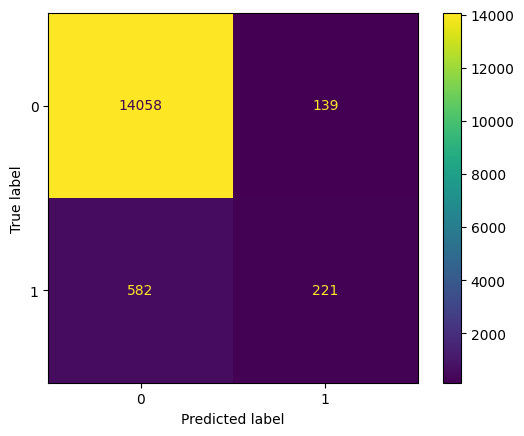

In [ ]:
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = my_model.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
print("The accuracy of the model on validation set is", my_model.score(X_test,y_test))

The accuracy of the model on validation set is 0.9519333333333333


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9528666666666666


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
input_shape = [X_train.shape[1]]

In [ ]:
model = keras.models.Sequential()

model.add(tf.keras.layers.BatchNormalization(input_shape = input_shape))

model.add(tf.keras.layers.Dense(32,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(16,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(8,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss="binary_crossentropy",metrics=['accuracy'])
model.fit(X_train,y_train,batch_size = 20,epochs = 50)

Epoch 1/50
1750/1750 [==============================] - 8s 3ms/step - loss: 0.2696 - accuracy: 0.9101
Epoch 2/50
1750/1750 [==============================] - 6s 4ms/step - loss: 0.1777 - accuracy: 0.9480
Epoch 3/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1683 - accuracy: 0.9481
Epoch 4/50
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1657 - accuracy: 0.9479
Epoch 5/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1636 - accuracy: 0.9481
Epoch 6/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1617 - accuracy: 0.9480
Epoch 7/50
1750/1750 [==============================] - 8s 5ms/step - loss: 0.1631 - accuracy: 0.9481
Epoch 8/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1610 - accuracy: 0.9479
Epoch 9/50
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1606 - accuracy: 0.9480
Epoch 10/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.159

In [ ]:
(df['target_variable']==1).sum()

2620

In [ ]:
(df['target_variable']==0).sum()

47380

In [ ]:
df.size

17350000

In [ ]:
print(df.Merchant_category.unique())



['Hotels' 'Fuel' 'Retail' 'Dept stores' 'Rent Payments' 'Utility'
 'Wallet load' 'Railways' 'Insurance' 'Medical' 'Cloth stores' 'Education'
 'Govt services' 'Home furnishing' 'Misc Services' 'Electronics'
 'Restaurants' 'Business Services' 'Transportation services'
 'Professional services & memberships' 'Contracted services' 'Food'
 'Digital goods' 'Airline' 'Direct marketing' 'Books & stationery' 'Auto'
 'Alcohol' 'Music stores' 'Quasi cash' 'Airports']


In [ ]:
len(df['Merchant_category'].unique().tolist())

31

<Axes: xlabel='target_variable', ylabel='count'>

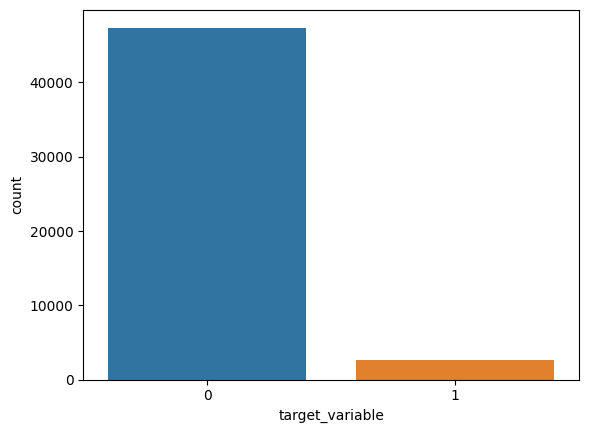

In [ ]:
sns.countplot(x='target_variable',data=df)

In [ ]:
df.isnull()

,primary_key,transaction_amount,merchant_name,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

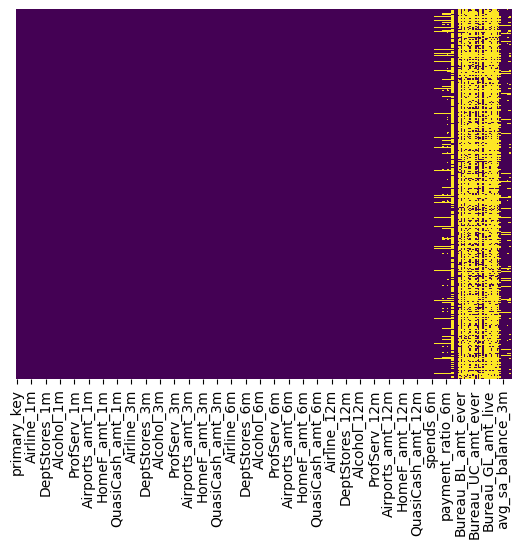

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

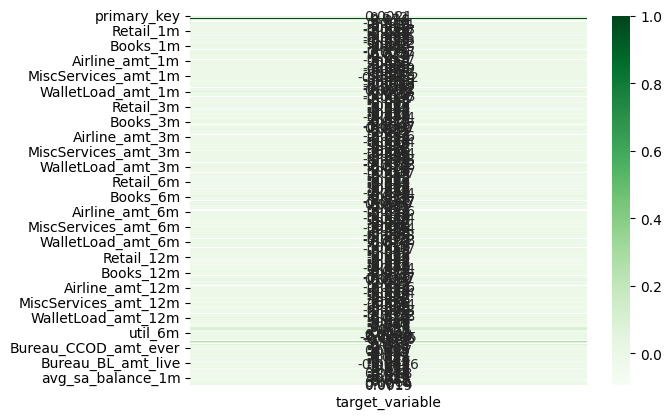

In [ ]:
from matplotlib.pyplot import figure
data1 = sns.heatmap(df.corr()[['target_variable']],annot = True,cmap='Greens')
plt.show()

In [ ]:
corr_df = df.corr()['target_variable']

In [ ]:
corr_df_sorted = corr_df.sort_values(ascending=False)
print(corr_df_sorted[corr_df_sorted>=-1].head(10))

target_variable        1.000000
count_of_emi_before    0.257829
revolve_3m             0.101253
revolve_6m             0.100521
revolve_1m             0.086568
                         ...   
ClothStores_12m       -0.060163
ClothStores_6m        -0.060163
Bureau_GL_amt_live    -0.072391
Bureau_UC_amt_live    -0.072730
credit_limit          -0.094797
Name: target_variable, Length: 325, dtype: float64


In [ ]:
print(corr_df_sorted[corr_df_sorted>=-1].head(50))

target_variable                     1.000000
count_of_emi_before                 0.257829
revolve_3m                          0.101253
revolve_6m                          0.100521
revolve_1m                          0.086568
ASSET_OWNERSHIP                     0.078338
revolve_interest_rate               0.073832
age                                 0.061755
transaction_amount                  0.041783
WalletLoad_amt_1m                   0.037940
WalletLoad_1m                       0.030820
RentPayments_1m                     0.027562
Bureau_TW_amt_ever                  0.025017
WalletLoad_3m                       0.024110
WalletLoad_6m                       0.024110
WalletLoad_12m                      0.024110
WalletLoad_amt_12m                  0.019306
WalletLoad_amt_3m                   0.019306
WalletLoad_amt_6m                   0.019306
Alcohol_6m                          0.014012
Alcohol_3m                          0.014012
Alcohol_12m                         0.014012
Alcohol_1m

In [ ]:
print(corr_df_sorted[corr_df_sorted>=-1].tail(50))

Restaurants_amt_12m   -0.036380
Restaurants_amt_6m    -0.036380
Restaurants_amt_3m    -0.036380
MiscServices_6m       -0.036462
MiscServices_3m       -0.036462
MiscServices_12m      -0.036462
Bureau_HL_amt_ever    -0.036501
Food_1m               -0.036575
avg_sa_balance_3m     -0.037698
Bureau_LAP_amt_live   -0.038266
Hotels_1m             -0.039558
ClothStores_amt_12m   -0.039909
ClothStores_amt_3m    -0.039909
ClothStores_amt_6m    -0.039909
Fuel_amt_6m           -0.040242
Fuel_amt_3m           -0.040242
Fuel_amt_12m          -0.040242
Bureau_AL_amt_live    -0.040635
avg_sa_balance_12m    -0.041216
Medical_12m           -0.041666
Medical_6m            -0.041666
Medical_3m            -0.041666
Food_12m              -0.041826
Food_6m               -0.041826
Food_3m               -0.041826
avg_sa_balance_6m     -0.041937
Restaurants_1m        -0.042395
ClothStores_1m        -0.042468
DeptStores_1m         -0.044389
Bureau_UC_amt_ever    -0.045371
spends_3m             -0.048124
spends_6

In [ ]:
nulldf=df[df.columns[df.isnull().any()]]

In [ ]:
sns.heatmap(nulldf,yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
null_counts = df.isnull().sum()
null_counts_sorted = null_counts.sort_values(ascending=False)
print(null_counts_sorted[null_counts_sorted>0])

Bureau_CV_amt_live                  49629
Bureau_UC_amt_live                  49252
Bureau_CV_amt_ever                  49226
Bureau_EL_amt_live                  49215
Bureau_UC_amt_ever                  48507
Bureau_GL_amt_live                  48446
Bureau_TW_amt_live                  47935
Bureau_LAP_amt_live                 47695
Bureau_BL_amt_live                  47622
Bureau_EL_amt_ever                  47414
Bureau_LAP_amt_ever                 46674
Bureau_BL_amt_ever                  45820
Bureau_GL_amt_ever                  45582
Bureau_AL_amt_live                  44638
Bureau_TW_amt_ever                  42804
Bureau_HL_amt_live                  41205
has_taken_emi_before                39958
count_of_emi_before                 39958
Bureau_sec_amt_live                 39799
Bureau_CD_amt_live                  39553
Bureau_AL_amt_ever                  38351
Bureau_PL_amt_live                  38188
Bureau_HL_amt_ever                  36745
Bureau_unsec_amt_live             

<Axes: xlabel='target_variable', ylabel='revolve_1m'>

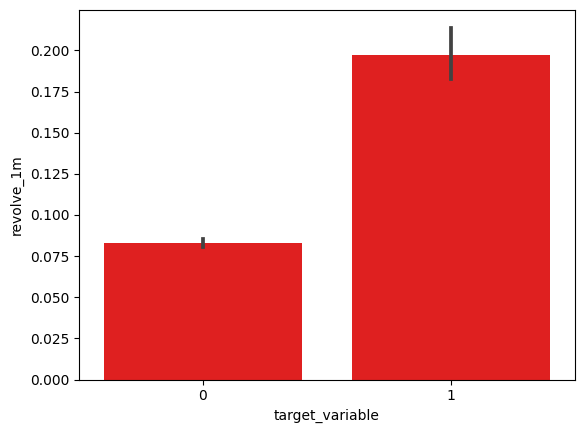

In [ ]:
sns.barplot(x = 'target_variable', y = 'revolve_1m',data = df,color='red')

<Axes: xlabel='revolve_1m', ylabel='count'>

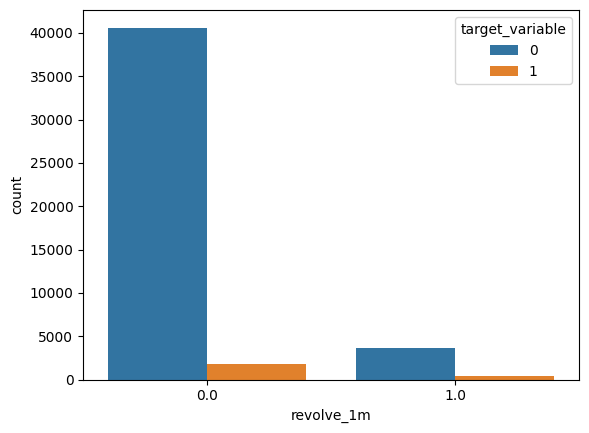

In [ ]:
sns.countplot(x='revolve_1m',hue='target_variable',data=df)

<Axes: xlabel='revolve_3m', ylabel='count'>

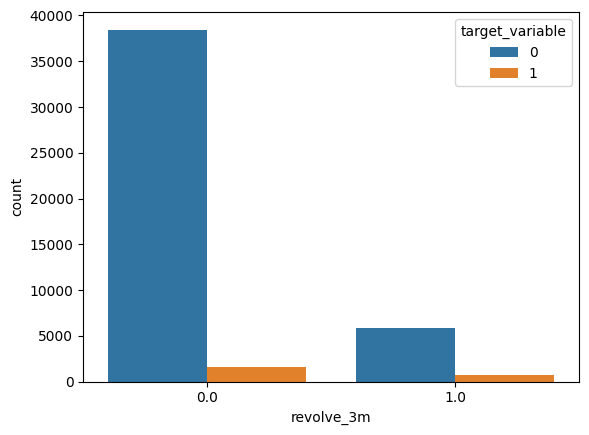

In [ ]:
sns.countplot(x='revolve_3m',hue='target_variable',data=df)

<Axes: xlabel='revolve_6m', ylabel='count'>

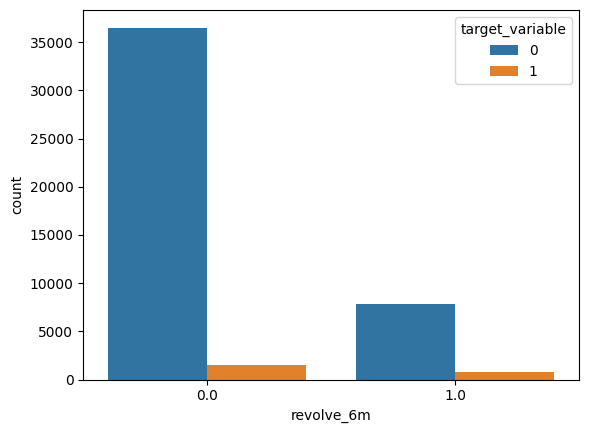

In [ ]:
sns.countplot(x='revolve_6m',hue='target_variable',data=df)

<Axes: xlabel='credit_limit', ylabel='Count'>

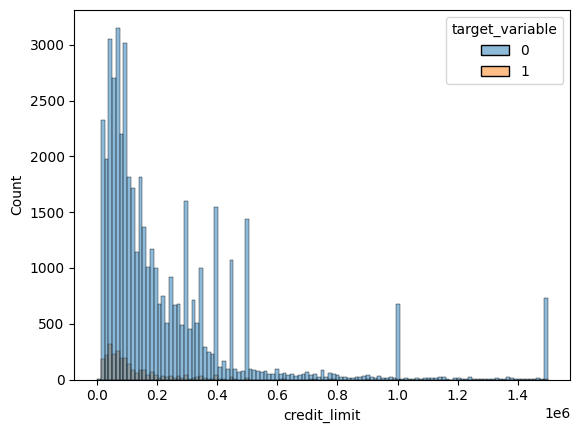

In [ ]:
sns.histplot(x = df['credit_limit'],hue = df['target_variable'])

In [ ]:
meanc = df['credit_limit'].mean()
df['credit_limit'] = df['credit_limit'].fillna(meanc)

<Axes: xlabel='credit_limit', ylabel='Count'>

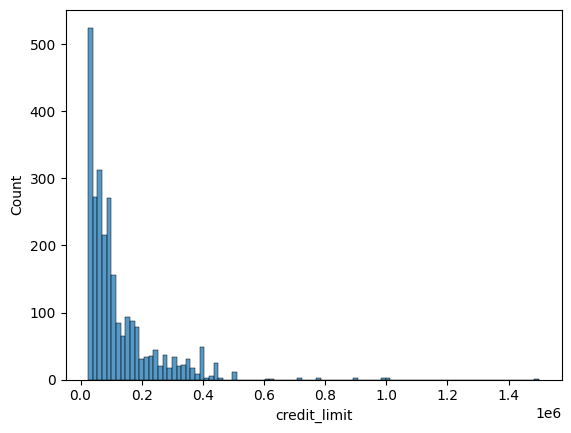

In [ ]:
sns.histplot(x = pos_data['credit_limit'])

In [ ]:
np.histogram(pos_data["credit_limit"])

(array([2068,  349,  177,   13,    3,    5,    4,    0,    0,    1]),
 array([  25000.,  172500.,  320000.,  467500.,  615000.,  762500.,
         910000., 1057500., 1205000., 1352500., 1500000.]))

<Axes: xlabel='credit_limit', ylabel='Count'>

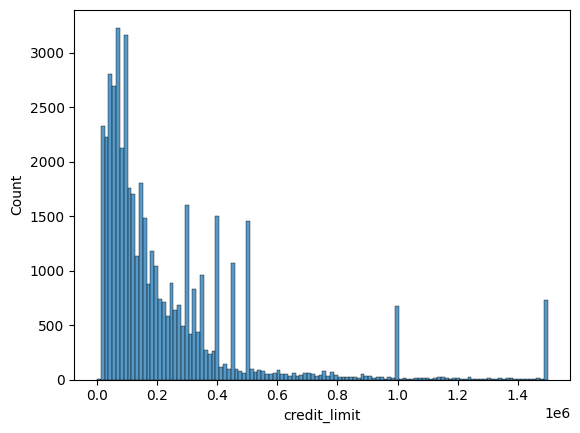

In [ ]:
sns.histplot(x = neg_data['credit_limit'])

9


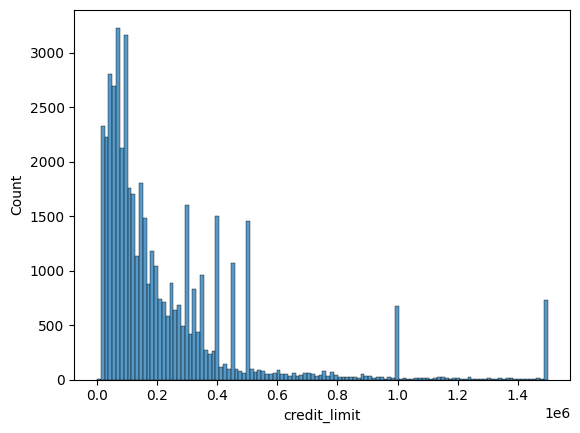

In [ ]:
# Plot histogram
ax = sns.histplot(data=df, x=neg_data['credit_limit'])

# Get number of bins
n_bins = len(ax.get_xticks()) - 1
print(n_bins)

<Axes: ylabel='Count'>

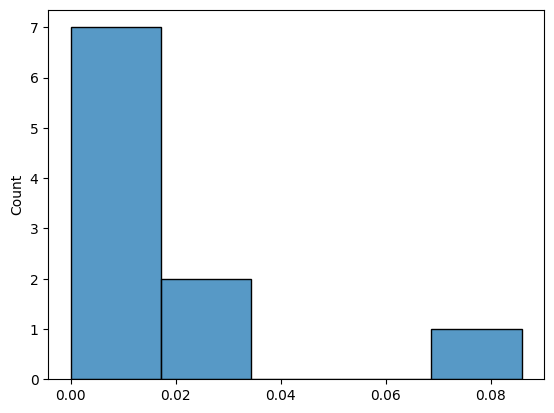

In [ ]:
pos_data = df.loc[df["target_variable"] == 1]
neg_data = df.loc[df["target_variable"] == 0]
pos_hist, bins = np.histogram(pos_data["credit_limit"])
neg_hist, bins = np.histogram(neg_data["credit_limit"])
ratio = pos_hist.astype(float) / neg_hist.astype(float)

# Plot histogram of the ratio
sns.histplot(data=ratio)

# # Add axis labels and title
# plt.xlabel("Ratio of Total Bill (Men/Women)")
# plt.ylabel("Count")
# plt.title("Histogram of Ratio of Total Bill by Gender")

In [ ]:
dfn=df
dfn.head()

,primary_key,transaction_amount,merchant_name,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,49099894,51079.86,MARRIOTT SURAT,IN,0,Hotels,9.0,288000.0,0,0,...,NaN,3500000.0,38758.46000,64367.36941,113262.3533,160922.63220,-0.168474,-0.597603,-0.445636,Affluent_Card
1,45954931,10118.00,DABWALI PETRO,IN,0,Fuel,36.0,25000.0,0,0,...,NaN,NaN,20184.79741,28980.68882,33703.9227,56910.01842,-0.257190,-0.241639,-0.699671,Mass_Card
2,44992070,4378.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,44823072,6337.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,49088796,54934.04,PAYPAL *JIEDUOBANGK,HK,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card


In [ ]:
dfn['revolve_interest_rate'].describe()

meanr = dfn['revolve_interest_rate'].mean()
dfn['revolve_interest_rate'] = dfn['revolve_interest_rate'].fillna(meanr)

<Axes: xlabel='product', ylabel='target_variable'>

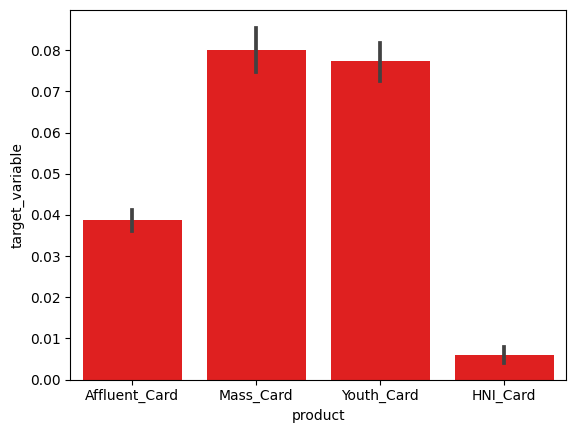

In [ ]:
sns.barplot(x = 'product', y ='target_variable',data = df,color='red')

<Axes: xlabel='target_variable', ylabel='revolve_3m'>

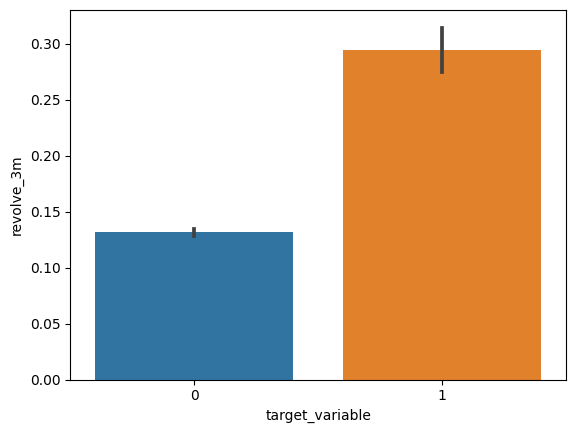

In [ ]:
sns.barplot(x = 'target_variable', y = 'revolve_3m',data = df)

<Axes: xlabel='target_variable', ylabel='revolve_6m'>

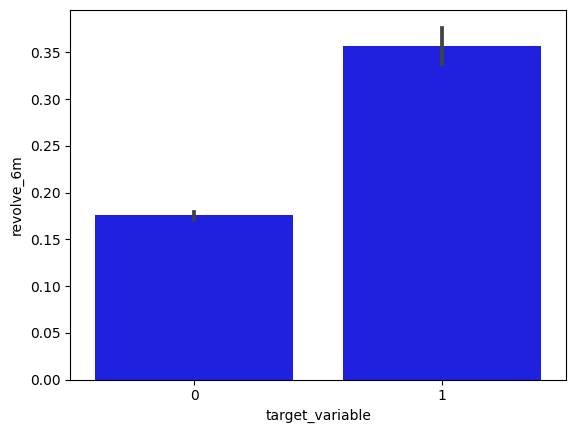

In [ ]:
sns.barplot(x = 'target_variable', y = 'revolve_6m',data = df,color='blue')

In [ ]:
df.fillna(0)

,primary_key,transaction_amount,merchant_name,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,49099894,51079.86,MARRIOTT SURAT,IN,0,Hotels,9.0,288000.0,0,0,...,0.0,3500000.0,38758.460000,64367.369410,113262.353300,160922.632200,-0.168474,-0.597603,-0.445636,Affluent_Card
1,45954931,10118.00,DABWALI PETRO,IN,0,Fuel,36.0,25000.0,0,0,...,0.0,0.0,20184.797410,28980.688820,33703.922700,56910.018420,-0.257190,-0.241639,-0.699671,Mass_Card
2,44992070,4378.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,0.0,51863.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Mass_Card
3,44823072,6337.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,0.0,51863.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Mass_Card
4,49088796,54934.04,PAYPAL *JIEDUOBANGK,HK,0,Retail,22.0,97000.0,0,0,...,0.0,51863.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Mass_Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,44367258,3976.37,GOVINDSAMY BASKARAN,IN,0,Fuel,22.0,150000.0,0,0,...,0.0,1783657.0,46481.095190,54441.174710,37003.745800,98999.267820,-0.023032,1.675239,-0.755055,Affluent_Card
49996,46280982,5097.50,PAYTM RENTAL,IN,0,Rent Payments,24.0,25000.0,0,0,...,0.0,166702.0,275.632222,1705.884118,1770.551609,3321.264392,-0.900393,-0.068999,-0.621572,Mass_Card
49997,46265583,26485.00,BAJAJALLIANZ BILLD,IN,0,Insurance,9.0,281000.0,0,0,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card
49998,44535212,2570.00,DR BS YADAV KIDS CURE,IN,0,Medical,9.0,281000.0,0,0,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card


<Axes: xlabel='product', ylabel='count'>

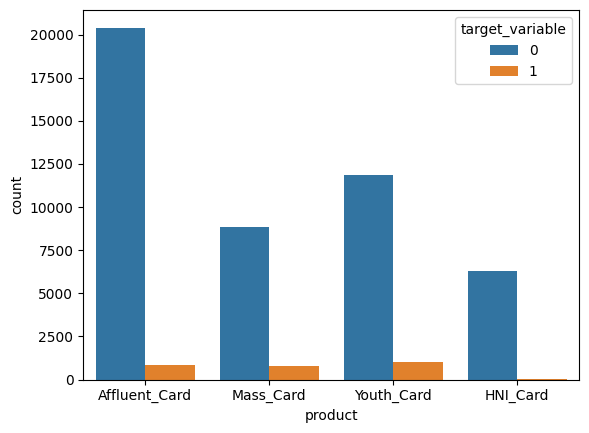

In [ ]:
sns.countplot(data=df, x='product', hue='target_variable')

<Axes: xlabel='target_variable', ylabel='avg_sa_balance_1m'>

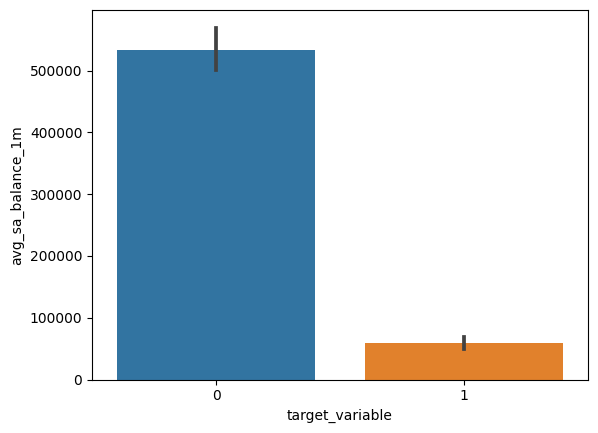

In [ ]:
sns.barplot(x = 'target_variable', y = 'avg_sa_balance_1m',data = df)

<Axes: xlabel='target_variable', ylabel='avg_sa_balance_3m'>

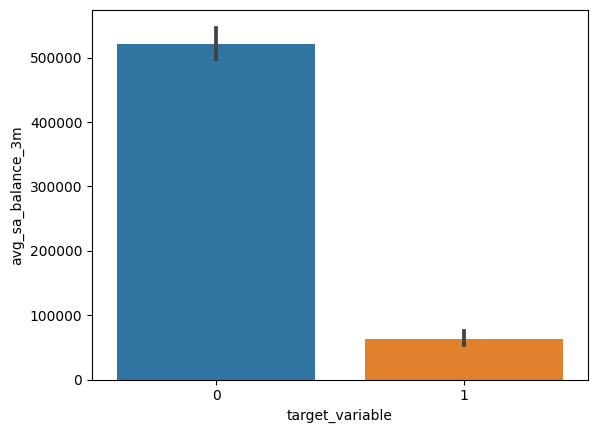

In [ ]:
sns.barplot(x = 'target_variable', y = 'avg_sa_balance_3m',data = df)

<Axes: xlabel='target_variable', ylabel='avg_sa_balance_6m'>

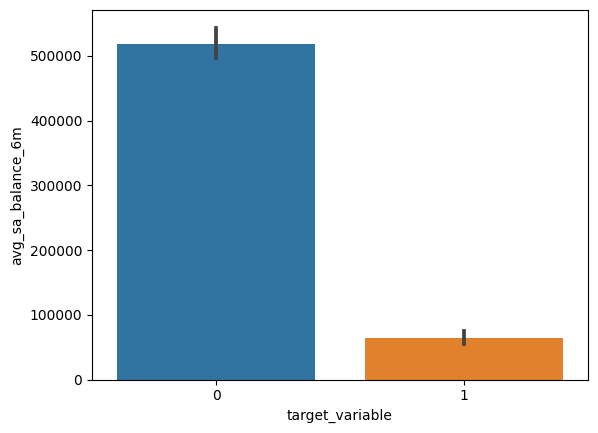

In [ ]:
sns.barplot(x = 'target_variable', y = 'avg_sa_balance_6m',data = df)

In [ ]:
df.drop('merchant_name',axis=1,inplace=True)
df.drop('merchant_country',axis=1,inplace=True)

<Axes: xlabel='age', ylabel='Count'>

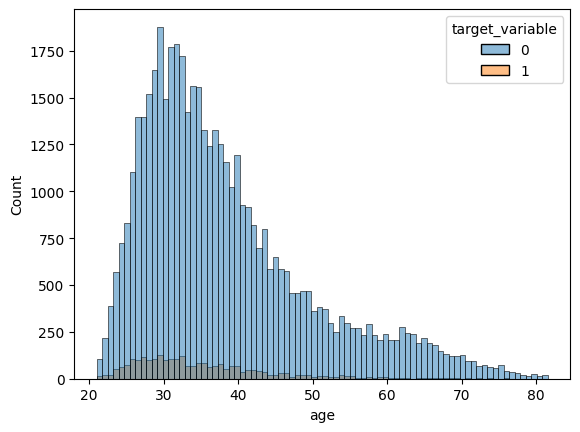

In [ ]:
df['age'] = -df['age']
sns.histplot(x = df['age'],hue = df['target_variable'])

<Axes: xlabel='credit_limit', ylabel='Count'>

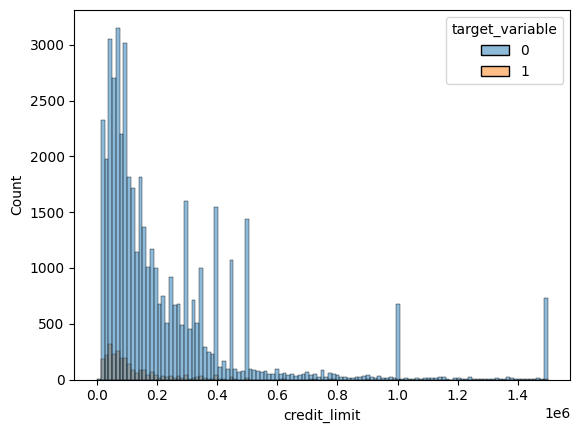

In [ ]:
sns.histplot(x = df['credit_limit'],hue = df['target_variable'])

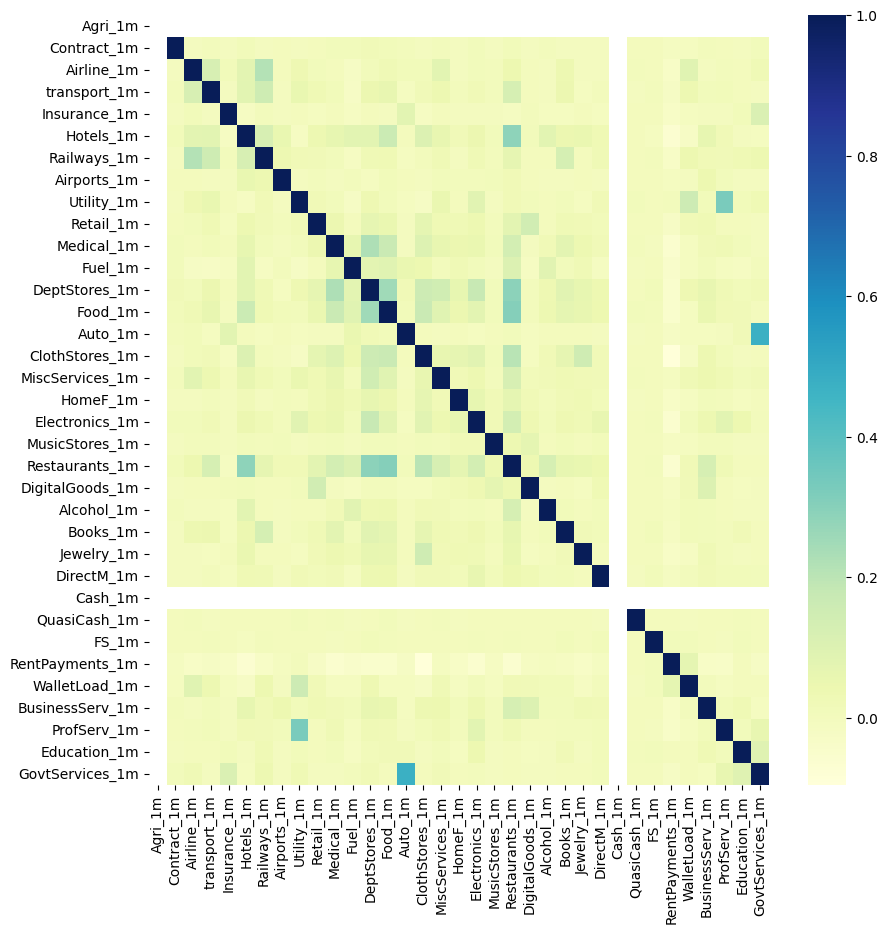

In [ ]:
dfom = df[['Agri_1m',
'Contract_1m'
,'Airline_1m'
,'transport_1m'
,'Insurance_1m'
,'Hotels_1m'
,'Railways_1m'
,'Airports_1m'
,'Utility_1m'
,'Retail_1m'
,'Medical_1m'
,'Fuel_1m'
,'DeptStores_1m'
,'Food_1m'
,'Auto_1m'
,'ClothStores_1m'
,'MiscServices_1m'
,'HomeF_1m'
,'Electronics_1m'
,'MusicStores_1m'
,'Restaurants_1m'
,'DigitalGoods_1m'
,'Alcohol_1m'
,'Books_1m'
,'Jewelry_1m'
,'DirectM_1m'
,'Cash_1m'
,'QuasiCash_1m'
,'FS_1m'
,'RentPayments_1m'
,'WalletLoad_1m'
,'BusinessServ_1m'
,'ProfServ_1m'
,'Education_1m'
,'GovtServices_1m']].copy()
dfom.head()
plt.figure(figsize=(10,10))
data1 = sns.heatmap(dfom.corr(),cmap="YlGnBu")
plt.show()

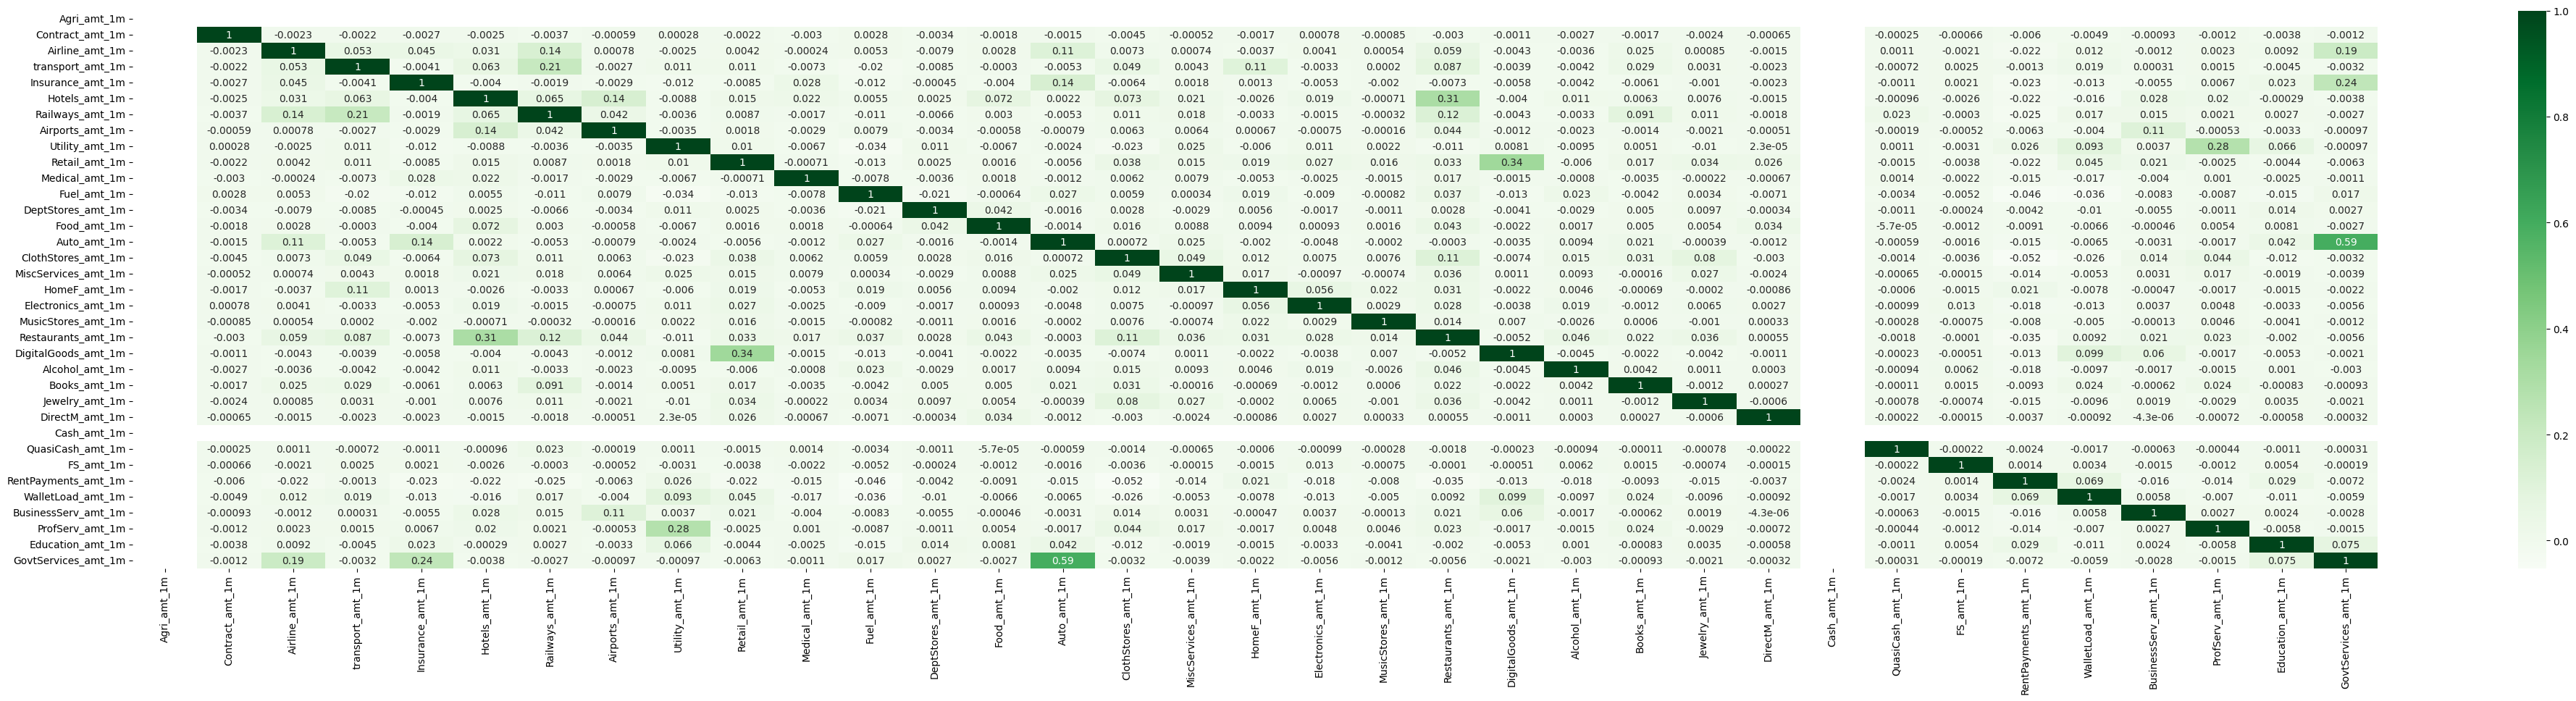

In [ ]:
dfoam = df[['Agri_amt_1m',
'Contract_amt_1m'
,'Airline_amt_1m'
,'transport_amt_1m'
,'Insurance_amt_1m'
,'Hotels_amt_1m'
,'Railways_amt_1m'
,'Airports_amt_1m'
,'Utility_amt_1m'
,'Retail_amt_1m'
,'Medical_amt_1m'
,'Fuel_amt_1m'
,'DeptStores_amt_1m'
,'Food_amt_1m'
,'Auto_amt_1m'
,'ClothStores_amt_1m'
,'MiscServices_amt_1m'
,'HomeF_amt_1m'
,'Electronics_amt_1m'
,'MusicStores_amt_1m'
,'Restaurants_amt_1m'
,'DigitalGoods_amt_1m'
,'Alcohol_amt_1m'
,'Books_amt_1m'
,'Jewelry_amt_1m'
,'DirectM_amt_1m'
,'Cash_amt_1m'
,'QuasiCash_amt_1m'
,'FS_amt_1m'
,'RentPayments_amt_1m'
,'WalletLoad_amt_1m'
,'BusinessServ_amt_1m'
,'ProfServ_amt_1m'
,'Education_amt_1m'
,'GovtServices_amt_1m']].copy()
plt.figure(figsize=(50,10))
data1 = sns.heatmap(dfoam.corr(),annot = True,cmap='Greens')
plt.show()

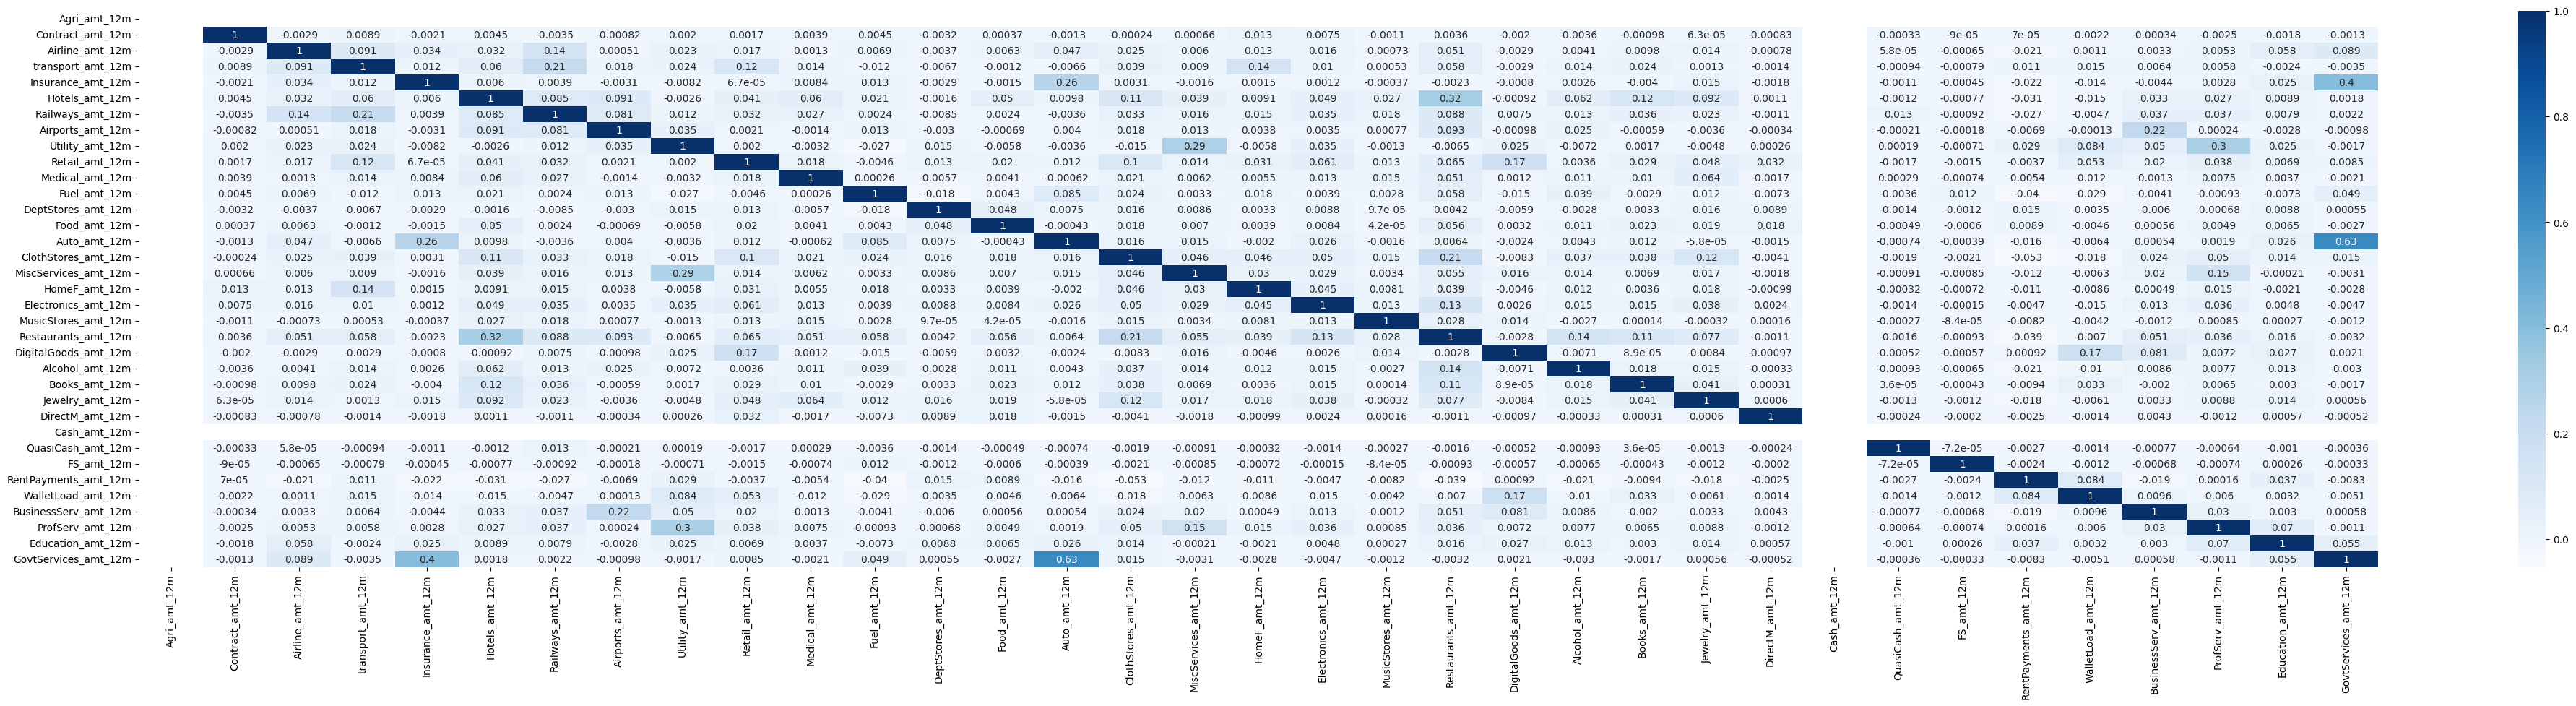

In [ ]:
dfoam = df[['Agri_amt_12m',
'Contract_amt_12m'
,'Airline_amt_12m'
,'transport_amt_12m'
,'Insurance_amt_12m'
,'Hotels_amt_12m'
,'Railways_amt_12m'
,'Airports_amt_12m'
,'Utility_amt_12m'
,'Retail_amt_12m'
,'Medical_amt_12m'
,'Fuel_amt_12m'
,'DeptStores_amt_12m'
,'Food_amt_12m'
,'Auto_amt_12m'
,'ClothStores_amt_12m'
,'MiscServices_amt_12m'
,'HomeF_amt_12m'
,'Electronics_amt_12m'
,'MusicStores_amt_12m'
,'Restaurants_amt_12m'
,'DigitalGoods_amt_12m'
,'Alcohol_amt_12m'
,'Books_amt_12m'
,'Jewelry_amt_12m'
,'DirectM_amt_12m'
,'Cash_amt_12m'
,'QuasiCash_amt_12m'
,'FS_amt_12m'
,'RentPayments_amt_12m'
,'WalletLoad_amt_12m'
,'BusinessServ_amt_12m'
,'ProfServ_amt_12m'
,'Education_amt_12m'
,'GovtServices_amt_12m']].copy()
plt.figure(figsize=(50,10))
data1 = sns.heatmap(dfoam.corr(),annot = True,cmap='Blues')
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df['Merchant_category']=df['Merchant_category'].astype('category')
df['product']=df['product'].astype('category')


In [ ]:
df['Merchant_category_new']=df['Merchant_category'].cat.codes
df['product_new']=df['product'].cat.codes


In [ ]:
enc=OneHotEncoder()

In [ ]:
enc_data=pd.DataFrame(enc.fit_transform(df[['Merchant_category_new','product_new']]).toarray())

In [ ]:
dfen=df.join(enc_data)

In [ ]:
dfen=pd.get_dummies(df)

In [ ]:
dfen = pd.get_dummies(df, columns = ['Merchant_category','product'])

In [ ]:
dfen.head()

,primary_key,transaction_amount,target_variable,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,transport_1m,Insurance_1m,...,Merchant_category_Rent Payments,Merchant_category_Restaurants,Merchant_category_Retail,Merchant_category_Transportation services,Merchant_category_Utility,Merchant_category_Wallet load,product_Affluent_Card,product_HNI_Card,product_Mass_Card,product_Youth_Card
0,49099894,51079.86,0,9.0,288000.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,45954931,10118.00,0,36.0,25000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,44992070,4378.00,0,22.0,97000.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,44823072,6337.00,0,22.0,97000.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,49088796,54934.04,0,22.0,97000.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
dfen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 378 entries, primary_key to product_Youth_Card
dtypes: float64(187), int64(156), uint8(35)
memory usage: 132.5 MB


In [ ]:
dfen=dfen.fillna(0)

In [ ]:
dfen.isnull().values.any()

False

In [ ]:
dfen.shape

(50000, 378)

In [ ]:
ls=[]
ls=dfen.isnull().sum()
print(ls)

primary_key                      0
transaction_amount               0
target_variable                  0
revolve_interest_rate            0
credit_limit                     0
                                ..
Merchant_category_Wallet load    0
product_Affluent_Card            0
product_HNI_Card                 0
product_Mass_Card                0
product_Youth_Card               0
Length: 378, dtype: int64


In [ ]:
data1= dfen.sample(frac = 0.1,random_state=1)
data1.shape

(5000, 378)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()
# df_scaled = std_scaler.fit_transform(dfen)
# df_scaled.head()



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(dfen.drop('target_variable',axis=1),
                                                    dfen['target_variable'], test_size=0.30,
                                                    random_state=101)

In [ ]:
pipe = make_pipeline(StandardScaler(),
                     LogisticRegression(max_iter=1000))

#fitting data into the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
# predicting values
y_pred = pipe.predict(X_test)

# calculating accuracy score
accuracy_score = accuracy_score(y_pred,y_test)
print('accuracy score : ',accuracy_score)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy score :  0.9469333333333333


In [ ]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# # predicting values
# y_pred = pipeline.predict(X_test)
# # calculating accuracy score
# ac= accuracy_score(y_pred,y_test)
# print('accuracy score : ',ac)

In [ ]:
# y_test

18447    0
17768    0
45879    0
16972    0
12165    0
        ..
22988    0
16478    0
26928    0
2922     1
10954    0
Name: target_variable, Length: 15000, dtype: int64

In [ ]:
y_pred

array([0.02, 0.  , 0.  , ..., 0.1 , 0.08, 0.09])

In [ ]:
# hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
#                   'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9533333333333334


In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# clf = GridSearchCV(pipeline, hyperparameters, cv=10)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adb = AdaBoostClassifier()
adb_model = adb.fit(X_train,y_train)

In [ ]:
print("The accuracy of the model on validation set is", adb_model.score(X_test,y_test))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();


The accuracy of the model on validation set is 0.9468666666666666


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
input_shape = [X_train.shape[1]]

In [ ]:
model = keras.models.Sequential()

model.add(tf.keras.layers.BatchNormalization(input_shape = input_shape))

model.add(tf.keras.layers.Dense(32,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(16,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(8,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss="binary_crossentropy",metrics=['accuracy'])
model.fit(X_train,y_train,batch_size = 20,epochs = 50)

Epoch 1/50
2475/2475 [==============================] - 9s 3ms/step - loss: 0.2425 - accuracy: 0.9227
Epoch 2/50
2475/2475 [==============================] - 7s 3ms/step - loss: 0.1750 - accuracy: 0.9475
Epoch 3/50
2475/2475 [==============================] - 7s 3ms/step - loss: 0.1697 - accuracy: 0.9475
Epoch 4/50
2475/2475 [==============================] - 7s 3ms/step - loss: 0.1656 - accuracy: 0.9473
Epoch 5/50
2475/2475 [==============================] - 7s 3ms/step - loss: 0.1642 - accuracy: 0.9476
Epoch 6/50
2475/2475 [==============================] - 7s 3ms/step - loss: 0.1633 - accuracy: 0.9475
Epoch 7/50
2475/2475 [==============================] - 7s 3ms/step - loss: 0.1613 - accuracy: 0.9476
Epoch 8/50
2475/2475 [==============================] - 7s 3ms/step - loss: 0.1599 - accuracy: 0.9475
Epoch 9/50
2475/2475 [==============================] - 7s 3ms/step - loss: 0.1610 - accuracy: 0.9475
Epoch 10/50
2475/2475 [==============================] - 6s 2ms/step - loss: 0.159

In [ ]:
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

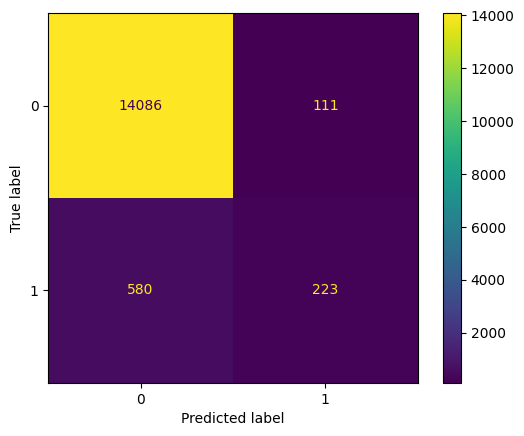

In [ ]:
# Fitting XGBoost to the training data
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = my_model.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
print("The accuracy of the model on validation set is", my_model.score(X_test,y_test))

The accuracy of the model on validation set is 0.9539333333333333


0.9432666666666667

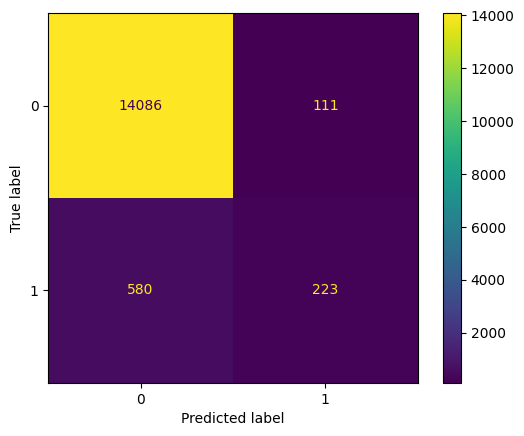

In [ ]:
## Import the Classifier.
from sklearn.neighbors import KNeighborsClassifier
## Instantiate the model with 5 neighbors.
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
knn.fit(X_train, y_train)
## See how the model performs on the test data.
y_pred = my_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();
knn.score(X_test, y_test)

In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/case_study_validation.csv")

In [ ]:
df2.drop('merchant_name',axis=1,inplace=True)
df2.drop('merchant_country',axis=1,inplace=True)

In [ ]:
dfen2 = pd.get_dummies(df2, columns = ['Merchant_category','product'])

In [ ]:
dfen2=dfen2.fillna(0)

In [ ]:
dfen2.isnull().values.any()

False

In [ ]:
dfen2.shape

(30000, 377)

In [ ]:
y_pred = my_model.predict_proba(dfen2)

In [ ]:
y_pred=y_pred[:,1]

In [ ]:
dfen2['probability']=y_pred

In [ ]:
dfen2.head()

,primary_key,transaction_amount,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,transport_1m,Insurance_1m,Hotels_1m,...,Merchant_category_Restaurants,Merchant_category_Retail,Merchant_category_Transportation services,Merchant_category_Utility,Merchant_category_Wallet load,product_Affluent_Card,product_HNI_Card,product_Mass_Card,product_Youth_Card,probability
0,43231676,88258.14,9.0,288000.0,0,0,0,1,0,6,...,0,0,0,0,0,1,0,0,0,0.000461
1,44150123,8891.30,22.0,97000.0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0.000354
2,48126804,60000.00,22.0,97000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0.000269
3,44577506,3499.00,22.0,97000.0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0.000327
4,45463164,21358.00,24.0,25000.0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0.046243


In [ ]:
dfsub=dfen2[['primary_key','probability']]

In [ ]:
dfsub.head()

,primary_key,probability
0,43231676,0.000461
1,44150123,0.000354
2,48126804,0.000269
3,44577506,0.000327
4,45463164,0.046243


In [ ]:
dfsub.to_excel('new_Submission.xlsx',sheet_name='Sheet_name_1')

In [ ]:
dfen2['primary_key']